# 9. Comparative Feature Analysis

This notebook analyzes the relationships between features *within* each dataset (modality/view) and *between* the different datasets.

**Goals:**
1.  Assess the correlation between color (spectral) traits and morphological traits within each view.

2.  Assess the consistency of measurements between the different views (e.g., how well does side view area correlate with top view area?).

In [8]:
# Imports 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
# Load Merged Data 
try:
    merged_df = pd.read_csv('../results/data/merged_all_datasets.csv')
    print("Merged data loaded successfully.")
    # Convert Date column back if needed, though not strictly necessary for correlations
    # merged_df['Date'] = pd.to_datetime(merged_df['Date'])
except FileNotFoundError:
    print("Error: 'merged_all_datasets.csv' not found.")
    print("Please run notebook '00_data_integration.ipynb' first.")

Merged data loaded successfully.


In [10]:
#  Define Key Features 
# Define the base names of features you want to compare
morph_features_base = ['area', 'height', 'perimeter'] # Add others as needed
color_features_base = ['blue_yellow_mean', 'green_red_mean'] # Add others as needed

# Define the suffixes used during merging
suffixes = ['_side_old', '_side_new', '_top_new']

# Generate the full list of suffixed column names
all_morph_features = [f"{feat}{suf}" for feat in morph_features_base for suf in suffixes]
all_color_features = [f"{feat}{suf}" for feat in color_features_base for suf in suffixes]

## Goal 1: Within-Dataset Correlations (Color vs. Morphology)
We will create a heatmap for each dataset showing the correlation between its color and morphological features.


--- Correlations for Dataset: _side_old ---


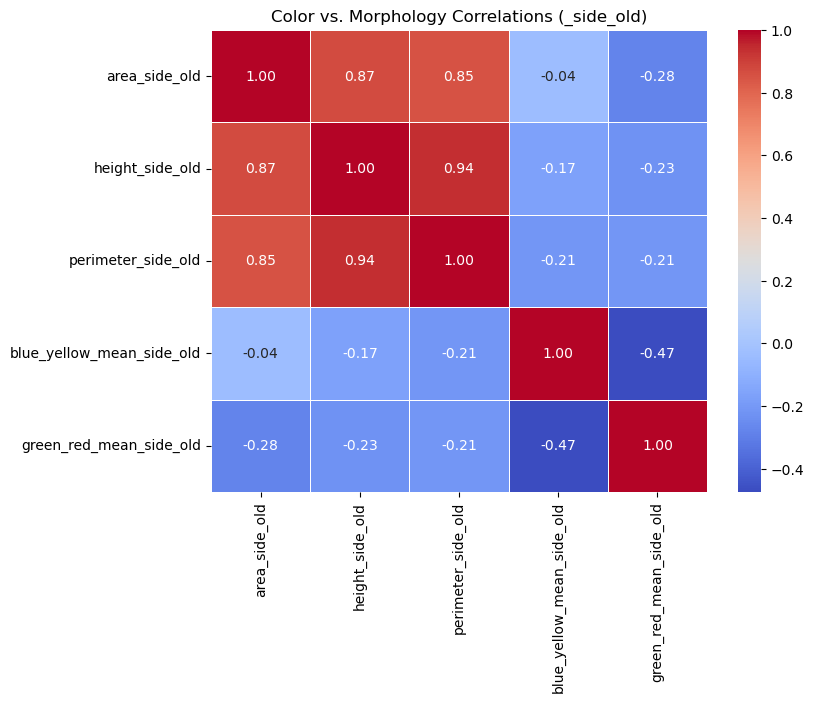


--- Correlations for Dataset: _side_new ---


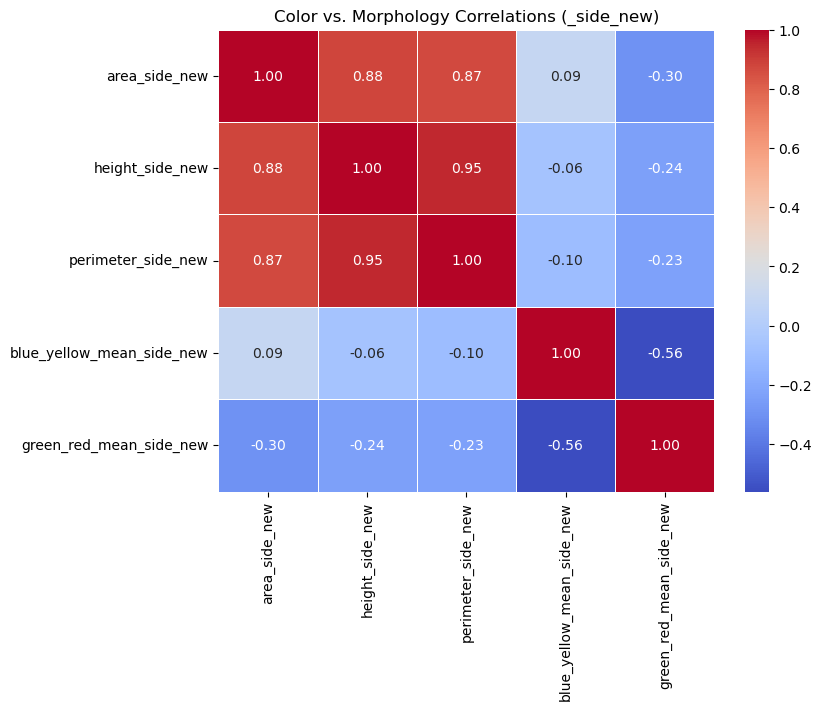


--- Correlations for Dataset: _top_new ---


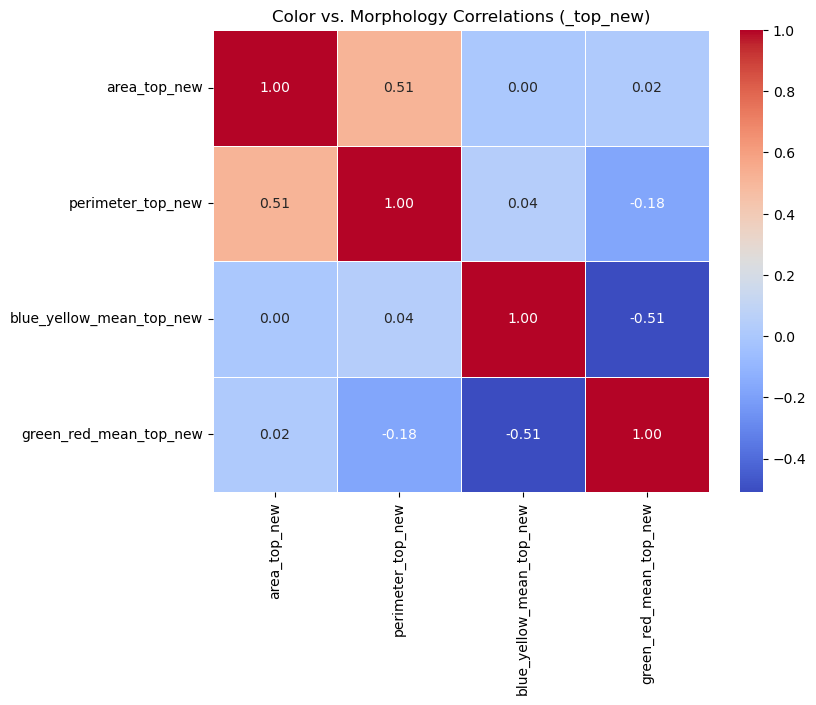

In [11]:
# Within-Dataset Heatmaps
for suffix in suffixes:
    print(f"\n--- Correlations for Dataset: {suffix} ---")
    
    # Select columns for this specific dataset
    morph_cols = [f"{feat}{suffix}" for feat in morph_features_base]
    color_cols = [f"{feat}{suffix}" for feat in color_features_base]
    cols_subset = morph_cols + color_cols
    
    # Check if columns exist before calculating correlation
    existing_cols = [col for col in cols_subset if col in merged_df.columns]
    if len(existing_cols) < 2:
        print(f"Not enough columns found for {suffix} to calculate correlations. Skipping.")
        continue
        
    subset_df = merged_df[existing_cols].dropna() # Drop rows with any NaNs for correlation calc
    
    if subset_df.empty:
        print(f"No non-missing data found for correlation in {suffix}. Skipping.")
        continue

    # Calculate correlation matrix
    corr_matrix = subset_df.corr()
    
    # Plot heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title(f'Color vs. Morphology Correlations ({suffix})')
    plt.show()

## Goal 2: Between-Dataset Correlations (Feature Consistency)
We will create a heatmap showing how well key features (like 'area') correlate across the different datasets/views.


--- Comparing 'area' Across Datasets ---


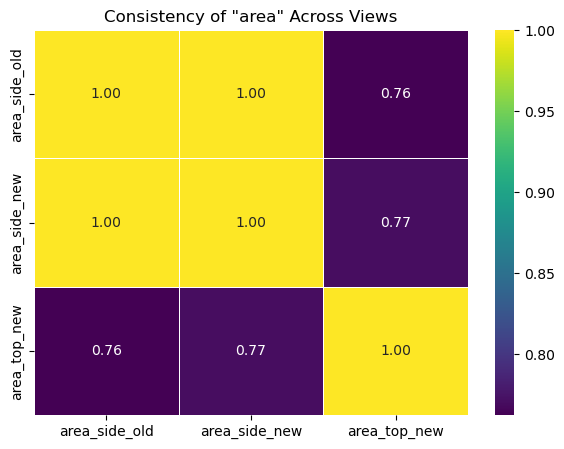

In [12]:
# Between-Dataset Heatmap
# Select one key feature (e.g., 'area') across all datasets
feature_to_compare = 'area' # Change this to 'height', etc. as needed
compare_cols = [f"{feature_to_compare}{suf}" for suf in suffixes if f"{feature_to_compare}{suf}" in merged_df.columns]

if len(compare_cols) < 2:
    print(f"\nNot enough datasets found with feature '{feature_to_compare}' to compare.")
else:
    print(f"\n--- Comparing '{feature_to_compare}' Across Datasets ---")
    compare_df = merged_df[compare_cols].dropna()
    
    if compare_df.empty:
         print(f"No non-missing overlapping data found for '{feature_to_compare}'.")
    else:
        corr_matrix_between = compare_df.corr()
        
        plt.figure(figsize=(7, 5))
        sns.heatmap(corr_matrix_between, annot=True, cmap='viridis', fmt=".2f", linewidths=.5)
        plt.title(f'Consistency of "{feature_to_compare}" Across Views')
        plt.show()

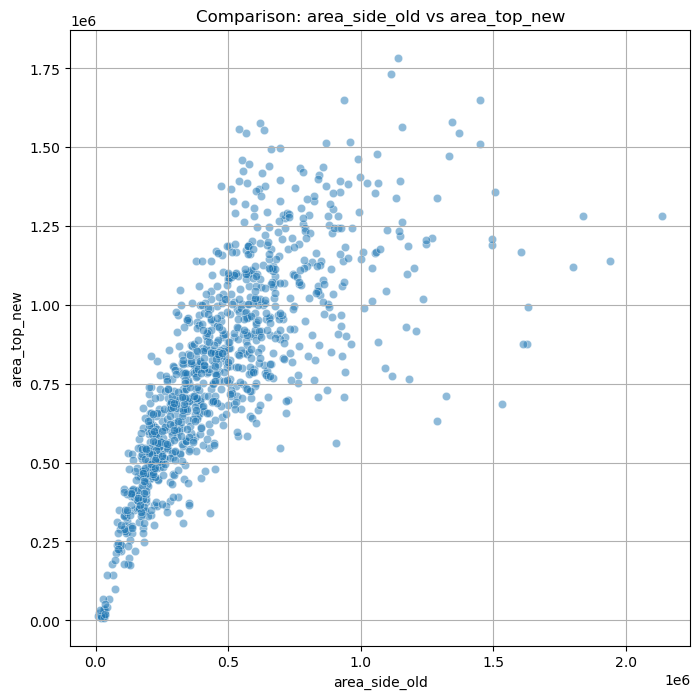

In [13]:
#  Scatter Plot for Key Comparison
# Example: Compare old side area vs. new top area
col1 = 'area_side_old'
col2 = 'area_top_new'

if col1 in merged_df.columns and col2 in merged_df.columns:
    plt.figure(figsize=(8, 8))
    # Use a sample to avoid overplotting if the dataset is large
    sample_df = merged_df.sample(min(1000, len(merged_df)), random_state=42)
    sns.scatterplot(data=sample_df, x=col1, y=col2, alpha=0.5)
    plt.title(f'Comparison: {col1} vs {col2}')
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.grid(True)
    plt.show()
else:
    print(f"\nSkipping scatter plot: Columns {col1} or {col2} not found.")